In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("✓ 套件匯入完成")

✓ 套件匯入完成


In [4]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# 從 UCI 下載訓練資料
print("正在下載訓練資料...")
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
train_data = pd.read_csv(train_url, names=column_names, 
                         na_values=' ?', skipinitialspace=True)

# 從 UCI 下載測試資料
print("正在下載測試資料...")
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
test_data = pd.read_csv(test_url, names=column_names, 
                        na_values=' ?', skipinitialspace=True, skiprows=1)

print("\n" + "="*60)
print("資料下載完成！")
print("="*60)
print(f"訓練資料大小: {train_data.shape[0]} 筆, {train_data.shape[1]} 欄")
print(f"測試資料大小: {test_data.shape[0]} 筆, {test_data.shape[1]} 欄")

# %%
# 查看資料前 5 筆
print("\n訓練資料前 5 筆：")
train_data.head()

# %%
# 查看資料資訊
print("訓練資料資訊：")
train_data.info()

# %%
# 檢查缺失值
print("\n訓練資料缺失值統計：")
print(train_data.isnull().sum())

print("\n測試資料缺失值統計：")
print(test_data.isnull().sum())

正在下載訓練資料...
正在下載測試資料...

資料下載完成！
訓練資料大小: 32561 筆, 15 欄
測試資料大小: 16281 筆, 15 欄

訓練資料前 5 筆：
訓練資料資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+

In [5]:
test_data['income'] = test_data['income'].str.replace('.', '', regex=False)

# 移除包含缺失值的資料
print(f"\n清理前 - 訓練資料: {train_data.shape[0]} 筆")
print(f"清理前 - 測試資料: {test_data.shape[0]} 筆")

train_data = train_data.dropna()
test_data = test_data.dropna()

print(f"\n清理後 - 訓練資料: {train_data.shape[0]} 筆")
print(f"清理後 - 測試資料: {test_data.shape[0]} 筆")

# %%
# 分離特徵 (X) 和目標變數 (y)
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']

X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

print(f"\n訓練特徵矩陣大小: {X_train.shape}")
print(f"測試特徵矩陣大小: {X_test.shape}")

# %%
# 查看目標變數分布
print("\n訓練資料目標變數分布：")
print(y_train.value_counts())
print(f"\n比例：\n{y_train.value_counts(normalize=True)}")

# %%
# 特徵編碼 - 處理類別型變數
print("\n正在進行特徵編碼...")

# 識別類別型和數值型特徵
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

print(f"類別型特徵 ({len(categorical_features)} 個): {list(categorical_features)}")
print(f"數值型特徵 ({len(numerical_features)} 個): {list(numerical_features)}")

# 使用 Label Encoder 編碼類別型特徵
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

# 編碼目標變數
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

print(f"\n目標變數編碼：{dict(zip(target_encoder.classes_, target_encoder.transform(target_encoder.classes_)))}")
print("✓ 特徵編碼完成")


清理前 - 訓練資料: 32561 筆
清理前 - 測試資料: 16281 筆

清理後 - 訓練資料: 32561 筆
清理後 - 測試資料: 16281 筆

訓練特徵矩陣大小: (32561, 14)
測試特徵矩陣大小: (16281, 14)

訓練資料目標變數分布：
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

比例：
income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

正在進行特徵編碼...
類別型特徵 (8 個): ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
數值型特徵 (6 個): ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

目標變數編碼：{'<=50K': np.int64(0), '>50K': np.int64(1)}
✓ 特徵編碼完成


In [4]:
print("\n" + "="*60)
print("開始訓練決策樹分類器 (CART)")
print("="*60)

# 建立 CART 決策樹分類器
dt_classifier = DecisionTreeClassifier(
    criterion='gini',           # 使用 Gini 不純度
    max_depth=10,               # 限制樹的深度
    min_samples_split=100,      # 節點分裂的最小樣本數
    min_samples_leaf=50,        # 葉節點的最小樣本數
    random_state=42             # 固定隨機種子，確保結果可重現
)

# 訓練模型
dt_classifier.fit(X_train, y_train_encoded)

print("\n✓ 模型訓練完成！")
print(f"決策樹深度: {dt_classifier.get_depth()}")
print(f"葉節點數量: {dt_classifier.get_n_leaves()}")



開始訓練決策樹分類器 (CART)

✓ 模型訓練完成！
決策樹深度: 10
葉節點數量: 155



模型效能評估

【訓練資料分類正確率】: 0.8616 (86.16%)
【測試資料分類正確率】: 0.8568 (85.68%)

訓練與測試正確率差異: 0.0048 (0.48%)

訓練資料詳細分類報告
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     24720
        >50K       0.78      0.59      0.67      7841

    accuracy                           0.86     32561
   macro avg       0.83      0.77      0.79     32561
weighted avg       0.86      0.86      0.85     32561


測試資料詳細分類報告
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91     12435
        >50K       0.76      0.57      0.65      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.76      0.78     16281
weighted avg       0.85      0.86      0.85     16281


測試資料混淆矩陣：
[[11749   686]
 [ 1646  2200]]


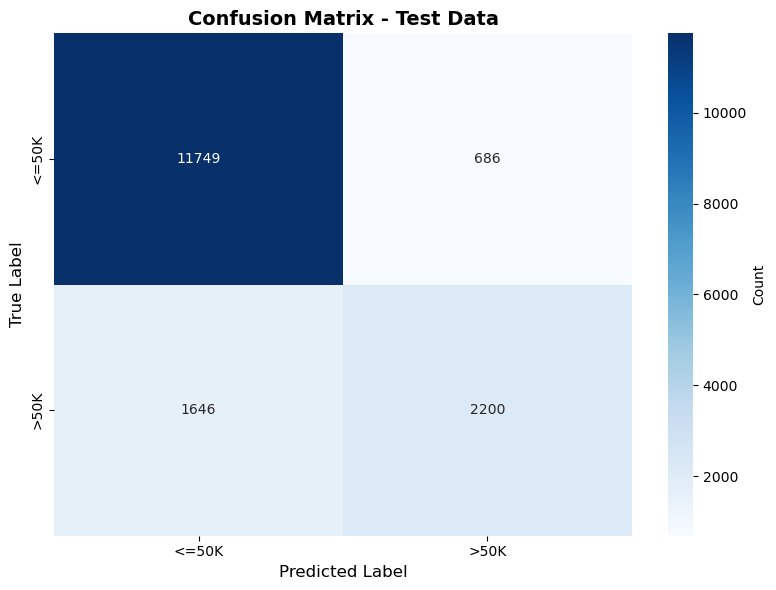

In [5]:
print("\n" + "="*60)
print("模型效能評估")
print("="*60)

# 預測訓練資料
y_train_pred = dt_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)

# 預測測試資料
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

# 顯示結果
print(f"\n【訓練資料分類正確率】: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"【測試資料分類正確率】: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\n訓練與測試正確率差異: {abs(train_accuracy - test_accuracy):.4f} ({abs(train_accuracy - test_accuracy)*100:.2f}%)")

# %%
# 詳細分類報告 - 訓練資料
print("\n" + "="*60)
print("訓練資料詳細分類報告")
print("="*60)
print(classification_report(y_train_encoded, y_train_pred, 
                          target_names=target_encoder.classes_))

# %%
# 詳細分類報告 - 測試資料
print("\n" + "="*60)
print("測試資料詳細分類報告")
print("="*60)
print(classification_report(y_test_encoded, y_test_pred, 
                          target_names=target_encoder.classes_))

# %%
# 混淆矩陣 - 測試資料
cm = confusion_matrix(y_test_encoded, y_test_pred)
print("\n測試資料混淆矩陣：")
print(cm)

# 視覺化混淆矩陣
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Test Data', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()



特徵重要性排名
       Feature  Importance
  relationship    0.402970
 education-num    0.216493
  capital-gain    0.207411
  capital-loss    0.048056
           age    0.045624
hours-per-week    0.041651
    occupation    0.017274
     workclass    0.007686
        fnlwgt    0.005085
     education    0.004669
           sex    0.002782
          race    0.000300
marital-status    0.000000
native-country    0.000000


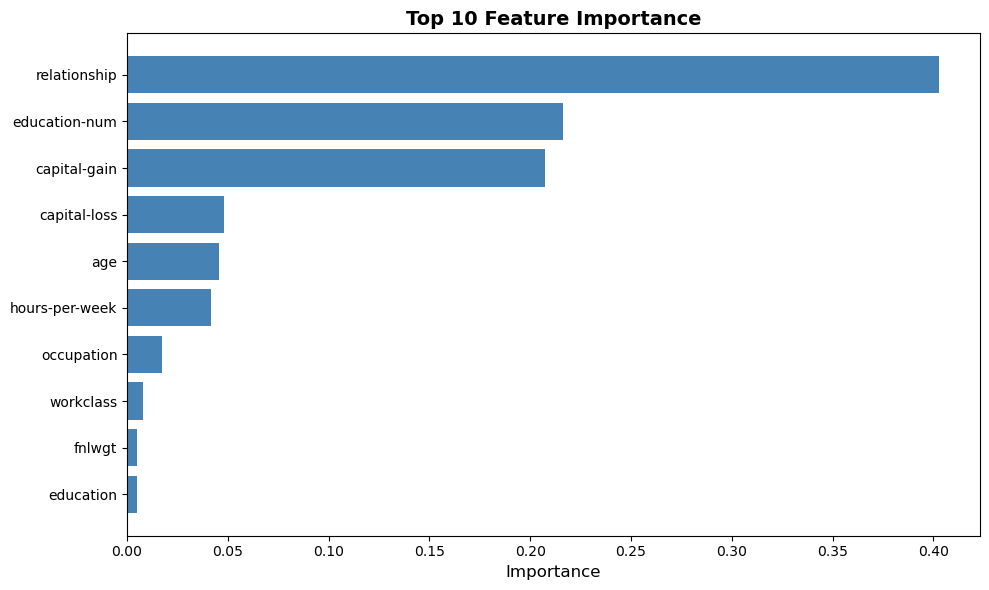


作業完成總結
✓ 已從 UCI Datasets 下載 Adult 資料集
✓ 訓練資料: 32561 筆
✓ 測試資料: 16281 筆
✓ 已訓練 CART 決策樹分類器
✓ 訓練資料分類正確率: 86.16%
✓ 測試資料分類正確率: 85.68%


In [6]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("特徵重要性排名")
print("="*60)
print(feature_importance.to_string(index=False))

# %%
# 視覺化特徵重要性（前 10 名）
plt.figure(figsize=(10, 6))
top_10 = feature_importance.head(10)
plt.barh(range(len(top_10)), top_10['Importance'], color='steelblue')
plt.yticks(range(len(top_10)), top_10['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.title('Top 10 Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# %% [markdown]
# ## 總結

# %%
print("\n" + "="*60)
print("作業完成總結")
print("="*60)
print(f"✓ 已從 UCI Datasets 下載 Adult 資料集")
print(f"✓ 訓練資料: {len(X_train)} 筆")
print(f"✓ 測試資料: {len(X_test)} 筆")
print(f"✓ 已訓練 CART 決策樹分類器")
print(f"✓ 訓練資料分類正確率: {train_accuracy*100:.2f}%")
print(f"✓ 測試資料分類正確率: {test_accuracy*100:.2f}%")
print("="*60)